# Clase 7 - Pandas

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv("titanic.csv")

In [3]:
import sqlite3 

# Crear un objeto de conexión que nos permita conectarnos a la BD SQLite3
conn = sqlite3.connect("datos.db")

# Crear la consulta de la tabla o tablas que van a alimentar nuestro dataframe
query = """
SELECT * FROM personas
"""

df = pd.read_sql_query(query, conn)

conn.close()

In [5]:
df

,id,nombre,apellido,edad,direccion,ocupacion,sueldo
0,1,María,Pérez,19,"Calle Falsa 101, Ciudad",Analista,85000.0
1,2,Pedro,Rodríguez,20,"Calle Falsa 102, Ciudad",Docente,90000.0
2,3,Lucía,Fernández,21,"Calle Falsa 103, Ciudad",Diseñador,95000.0
3,4,Carlos,López,22,"Calle Falsa 104, Ciudad",Administrador,100000.0
4,5,Ana,Martínez,23,"Calle Falsa 105, Ciudad",Programador,105000.0
...,...,...,...,...,...,...,...
195,196,Miguel,Sánchez,22,"Calle Falsa 296, Ciudad",Administrador,160000.0
196,197,Sofía,Romero,23,"Calle Falsa 297, Ciudad",Programador,165000.0
197,198,Diego,Díaz,24,"Calle Falsa 298, Ciudad",Ingeniero,170000.0
198,199,Laura,Torres,25,"Calle Falsa 299, Ciudad",Analista,175000.0


## GroupBy

In [8]:
data_gb_sex = data.groupby("Sex")

In [10]:
type(data_gb_sex)

pandas.core.groupby.generic.DataFrameGroupBy

In [12]:
data_gb_sex.count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


In [14]:
data_gb_emb = data.groupby("Embarked")

In [16]:
data_gb_emb.count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,,
C,168,168,168,168,168,130,168,168,168,168,69
Q,77,77,77,77,77,28,77,77,77,77,4
S,644,644,644,644,644,554,644,644,644,644,129


In [18]:
data.groupby("Sex").count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


In [20]:
data_gb_sex.ngroups

2

In [22]:
data_gb_sex.groups

{'female': [1, 2, 3, 8, 9, 10, 11, 14, 15, 18, 19, 22, 24, 25, 28, 31, 32, 38, 39, 40, 41, 43, 44, 47, 49, 52, 53, 56, 58, 61, 66, 68, 71, 79, 82, 84, 85, 88, 98, 100, 106, 109, 111, 113, 114, 119, 123, 128, 132, 133, 136, 140, 141, 142, 147, 151, 156, 161, 166, 167, 172, 177, 180, 184, 186, 190, 192, 194, 195, 198, 199, 205, 208, 211, 215, 216, 218, 229, 230, 233, 235, 237, 240, 241, 246, 247, 251, 254, 255, 256, 257, 258, 259, 264, 268, 269, 272, 274, 275, 276, ...], 'male': [0, 4, 5, 6, 7, 12, 13, 16, 17, 20, 21, 23, 26, 27, 29, 30, 33, 34, 35, 36, 37, 42, 45, 46, 48, 50, 51, 54, 55, 57, 59, 60, 62, 63, 64, 65, 67, 69, 70, 72, 73, 74, 75, 76, 77, 78, 80, 81, 83, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 101, 102, 103, 104, 105, 107, 108, 110, 112, 115, 116, 117, 118, 120, 121, 122, 124, 125, 126, 127, 129, 130, 131, 134, 135, 137, 138, 139, 143, 144, 145, 146, 148, 149, 150, 152, 153, 154, 155, ...]}

In [24]:
data_gb_sex.size()

Sex
female    314
male      577
dtype: int64

In [26]:
data_gb_sex.first()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
male,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,E46,S


In [28]:
data_gb_sex.last()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",19.0,1,2,W./C. 6607,23.45,B42,S
male,891,0,3,"Dooley, Mr. Patrick",32.0,0,0,370376,7.75,C148,Q


## Formas de agrupación

In [33]:
data[["Pclass", "Age"]].groupby("Pclass").mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [35]:
data.groupby("Sex")["Age"].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [37]:
data.groupby("Sex").Age.mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [39]:
data.groupby("Sex").Age.agg(["max", "min", "count", "mean"])

,max,min,count,mean
Sex,,,,
female,63.0,0.75,261,27.915709
male,80.0,0.42,453,30.726645


In [43]:
data.groupby("Sex").Age.agg(sex_max=("max"), sex_min=("min"), sex_promedio=("mean"))

,sex_max,sex_min,sex_promedio
Sex,,,
female,63.0,0.75,27.915709
male,80.0,0.42,30.726645


In [45]:
def categorizar(x):
    m = x.mean()
    return True if m > 29 else False

data.groupby("Sex").Age.agg(["max", "min", "mean", categorizar])

,max,min,mean,categorizar
Sex,,,,
female,63.0,0.75,27.915709,False
male,80.0,0.42,30.726645,True


In [49]:
data[["Pclass", "Sex", "Age"]].groupby(["Pclass", "Sex"]).agg(["count", "mean"])

Age           
              count       mean
Pclass Sex                    
1      female    85  34.611765
       male     101  41.281386
2      female    74  28.722973
       male      99  30.740707
3      female   102  21.750000
       male     253  26.507589

In [51]:
data[["Pclass", "Survived", "Age"]].groupby(["Pclass", "Survived"]).agg(["count", "mean"])

Age           
                count       mean
Pclass Survived                 
1      0           64  43.695312
       1          122  35.368197
2      0           90  33.544444
       1           83  25.901566
3      0          270  26.555556
       1           85  20.646118

In [59]:
122/(122+64), 83/(83+90), 85/(85+270)

(0.6559139784946236, 0.4797687861271676, 0.23943661971830985)

In [55]:
data.groupby("Pclass").Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [61]:
import matplotlib.pyplot as plt

<Axes: >

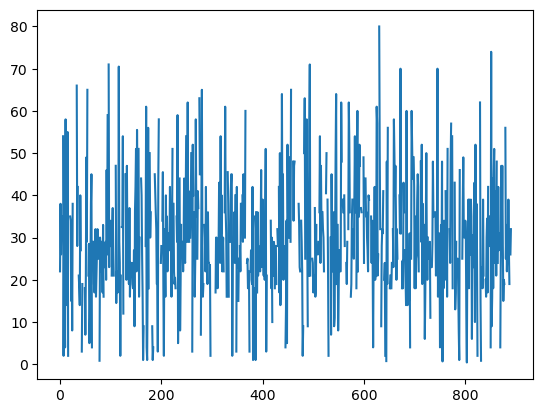

In [65]:
data["Age"].plot()

<Axes: ylabel='Frequency'>

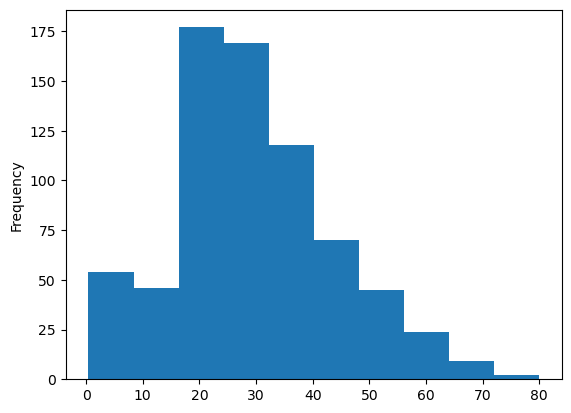

In [67]:
data["Age"].plot.hist()

<Axes: xlabel='Sex'>

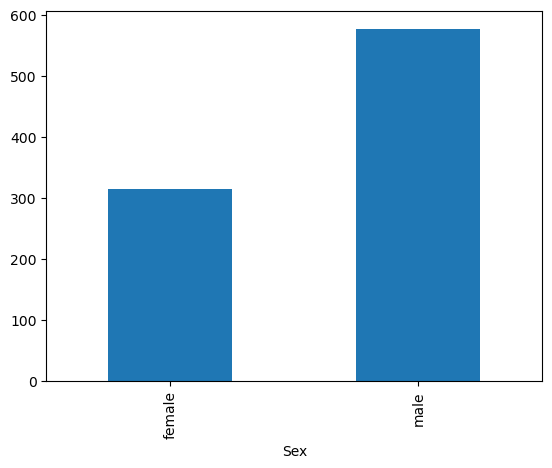

In [73]:
data.groupby("Sex").size().plot.bar()

In [75]:
data.groupby("Sex").size()

Sex
female    314
male      577
dtype: int64

<Axes: xlabel='Sex'>

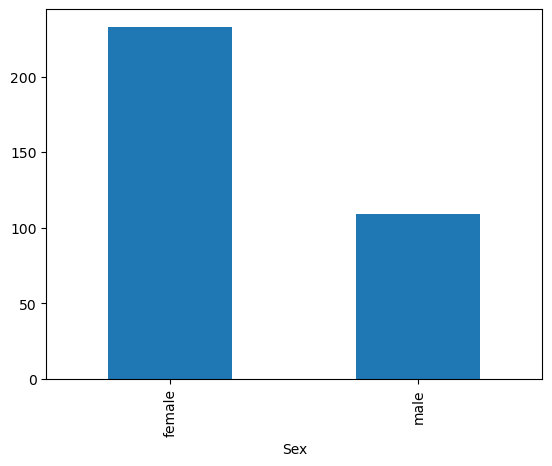

In [77]:
data.groupby("Sex").Survived.sum().plot.bar()

In [79]:
data.groupby("Sex").Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

<Axes: title={'center': 'Proporcion de pasajeros \nfemeninos/masculinos del Titanic'}, ylabel='Total'>

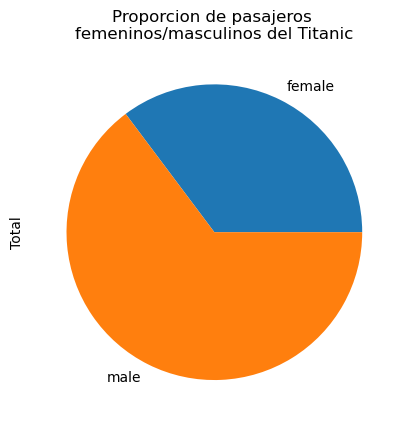

In [85]:
data.groupby("Sex").size().plot.pie(title="Proporcion de pasajeros \nfemeninos/masculinos del Titanic", label="Total")

In [91]:
# Ventas de Aumototrices

arr = np.random.randint(1,100,25).reshape((5,5))

In [93]:
arr

array([[ 5,  7,  4, 87, 29],
       [51, 29, 99, 26, 54],
       [96, 88, 15, 42, 79],
       [11, 85, 21, 31, 26],
       [90,  5, 55, 13, 36]])

In [95]:
df = pd.DataFrame(arr)

In [97]:
df

,0,1,2,3,4
0,5,7,4,87,29
1,51,29,99,26,54
2,96,88,15,42,79
3,11,85,21,31,26
4,90,5,55,13,36


In [99]:
df.columns = ["Audi", "Mercedes", "Fiat", "Renault", "Citroen"]
df.index = [2000,2004,2008,2012,2016]

In [101]:
df

,Audi,Mercedes,Fiat,Renault,Citroen
2000,5,7,4,87,29
2004,51,29,99,26,54
2008,96,88,15,42,79
2012,11,85,21,31,26
2016,90,5,55,13,36


<Axes: >

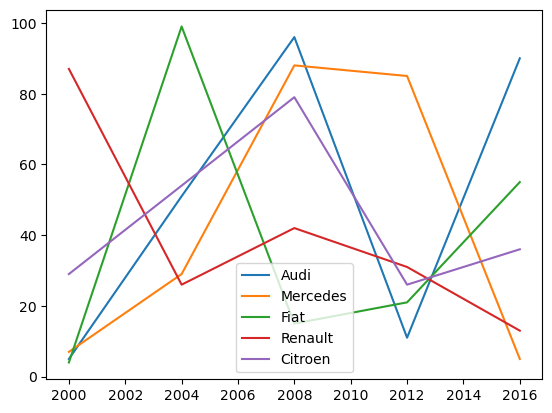

In [103]:
df.plot()

## Missing Values

- Nan
- np.inf (infinitos)
- None (python)

In [106]:
df1 = pd.DataFrame({"Fiat":[100,200,300,150,300], "Renault":[300,240,np.nan,300,400], "VW":[400,100,200,250,400],})

In [108]:
df1

,Fiat,Renault,VW
0,100,300.0,400
1,200,240.0,100
2,300,NaN,200
3,150,300.0,250
4,300,400.0,400


In [110]:
df1["Fiat"]+df1["Renault"]

0    400.0
1    440.0
2      NaN
3    450.0
4    700.0
dtype: float64

In [112]:
df1["Fiat"].add(df1["Renault"], fill_value=0)

0    400.0
1    440.0
2    300.0
3    450.0
4    700.0
dtype: float64

In [114]:
df1.mean()

Fiat       210.0
Renault    310.0
VW         270.0
dtype: float64

In [116]:
1240/4

310.0

In [120]:
df1.isna().sum()

Fiat       0
Renault    1
VW         0
dtype: int64

In [122]:
df1.notna()

,Fiat,Renault,VW
0,True,True,True
1,True,True,True
2,True,False,True
3,True,True,True
4,True,True,True


## dropna

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [141]:
data["Age"].mean()

29.699114141414142

In [137]:
data["Age"].fillna(29.6991, inplace=True)

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [143]:
714/891

0.8013468013468014

In [149]:
data["Cabin"].fillna("NNN", inplace=True)

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [153]:
data.dropna(inplace=True)

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


## interpolate()

In [158]:
# 
df1 = pd.DataFrame({"Fiat":[100,200,300,150,300], "Renault":[300,240,np.nan,300,400], "VW":[400,100,200,250,400],})

In [160]:
df1

,Fiat,Renault,VW
0,100,300.0,400
1,200,240.0,100
2,300,NaN,200
3,150,300.0,250
4,300,400.0,400


<Axes: >

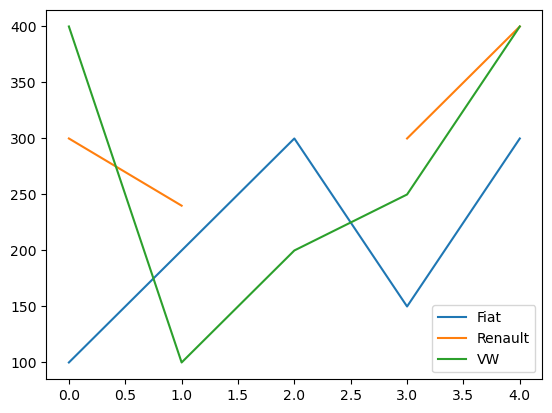

In [162]:
df1.plot()

In [174]:
df1.interpolate(method="quadratic")

,Fiat,Renault,VW
0,100,300.000000,400
1,200,240.000000,100
2,300,243.333333,200
3,150,300.000000,250
4,300,400.000000,400


In [168]:
((300-240)/2)+240

270.0

## Strings

In [177]:
data["Name"].str.lower()

0                                braund, mr. owen harris
1      cumings, mrs. john bradley (florence briggs th...
2                                 heikkinen, miss. laina
3           futrelle, mrs. jacques heath (lily may peel)
4                               allen, mr. william henry
                             ...                        
886                                montvila, rev. juozas
887                         graham, miss. margaret edith
888             johnston, miss. catherine helen "carrie"
889                                behr, mr. karl howell
890                                  dooley, mr. patrick
Name: Name, Length: 889, dtype: object

In [179]:
data["Name"].str.upper()

0                                BRAUND, MR. OWEN HARRIS
1      CUMINGS, MRS. JOHN BRADLEY (FLORENCE BRIGGS TH...
2                                 HEIKKINEN, MISS. LAINA
3           FUTRELLE, MRS. JACQUES HEATH (LILY MAY PEEL)
4                               ALLEN, MR. WILLIAM HENRY
                             ...                        
886                                MONTVILA, REV. JUOZAS
887                         GRAHAM, MISS. MARGARET EDITH
888             JOHNSTON, MISS. CATHERINE HELEN "CARRIE"
889                                BEHR, MR. KARL HOWELL
890                                  DOOLEY, MR. PATRICK
Name: Name, Length: 889, dtype: object

In [181]:
data["Name"].str.capitalize()

0                                Braund, mr. owen harris
1      Cumings, mrs. john bradley (florence briggs th...
2                                 Heikkinen, miss. laina
3           Futrelle, mrs. jacques heath (lily may peel)
4                               Allen, mr. william henry
                             ...                        
886                                Montvila, rev. juozas
887                         Graham, miss. margaret edith
888             Johnston, miss. catherine helen "carrie"
889                                Behr, mr. karl howell
890                                  Dooley, mr. patrick
Name: Name, Length: 889, dtype: object

In [183]:
data["Name"].str.title()

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 889, dtype: object

In [185]:
data["Name"].str.swapcase()

0                                bRAUND, mR. oWEN hARRIS
1      cUMINGS, mRS. jOHN bRADLEY (fLORENCE bRIGGS tH...
2                                 hEIKKINEN, mISS. lAINA
3           fUTRELLE, mRS. jACQUES hEATH (lILY mAY pEEL)
4                               aLLEN, mR. wILLIAM hENRY
                             ...                        
886                                mONTVILA, rEV. jUOZAS
887                         gRAHAM, mISS. mARGARET eDITH
888             jOHNSTON, mISS. cATHERINE hELEN "cARRIE"
889                                bEHR, mR. kARL hOWELL
890                                  dOOLEY, mR. pATRICK
Name: Name, Length: 889, dtype: object

In [187]:
data["Name"].str.split()

0                           [Braund,, Mr., Owen, Harris]
1      [Cumings,, Mrs., John, Bradley, (Florence, Bri...
2                             [Heikkinen,, Miss., Laina]
3      [Futrelle,, Mrs., Jacques, Heath, (Lily, May, ...
4                          [Allen,, Mr., William, Henry]
                             ...                        
886                            [Montvila,, Rev., Juozas]
887                    [Graham,, Miss., Margaret, Edith]
888       [Johnston,, Miss., Catherine, Helen, "Carrie"]
889                           [Behr,, Mr., Karl, Howell]
890                              [Dooley,, Mr., Patrick]
Name: Name, Length: 889, dtype: object

In [189]:
data["Name"].str.len()

0      23
1      51
2      22
3      44
4      24
       ..
886    21
887    28
888    40
889    21
890    19
Name: Name, Length: 889, dtype: int64

In [193]:
data["Name"].str.count("Mr").sum()

649

In [197]:
data["Name"].str.contains("John").sum()

52

In [201]:
data["Name"].str.startswith("Andersson").sum()

9

In [205]:
data["Cabin"].str.isalpha()

0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Cabin, Length: 889, dtype: bool

In [207]:
data["Cabin"].str.isnumeric()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Cabin, Length: 889, dtype: bool

In [213]:
data["Name"].str[-10:]

0      wen Harris
1      gs Thayer)
2      iss. Laina
3       May Peel)
4      liam Henry
          ...    
886    ev. Juozas
887    aret Edith
888    n "Carrie"
889    arl Howell
890    r. Patrick
Name: Name, Length: 889, dtype: object

## Dimensiones

- Temporal
- Geografica
- Categorias (productos, clientes, etc)